# Exploratory data analysis (EDA)

# 20 JUNE

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### cheking from which directory we are importing files

In [48]:
os.getcwd()

'C:\\Users\\Administrator\\Documents'

# Importing Dataset

In [3]:
df1 = pd.read_csv('student_scores.csv')

df1.head()

,Unnamed: 0,Name,Email,Age,Gender,City,Country,Math Score,Science Score
0,0,Joshua Pearson,ronaldlewis@example.com,44.0,Other,North Scottbury,Montserrat,10.0,22
1,1,Tommy Cole,swatson@example.com,53.0,Male,Lake Loganburgh,Equatorial Guinea,4.0,15
2,2,John Brock,georgesteven@example.org,50.0,Female,Ericchester,Sierra Leone,2.0,63
3,3,Steven Byrd,jessejenkins@example.net,34.0,Other,New Scotthaven,Sao Tome and Principe,57.0,86
4,4,Jose Anderson,vmcclain@example.net,55.0,Female,East Miafort,Germany,100.0,75


In [4]:
df2 = pd.read_csv('English_grades.csv')

df2.head()

,Unnamed: 0,Name,English Score
0,0,Joshua Pearson,20
1,1,Tommy Cole,41
2,2,John Brock,31
3,3,Steven Byrd,18
4,4,Jose Anderson,59


# we can merge these 2 documents and make it one

In [5]:
# we can merge these 2 documents and make it one
# that will be helpful to perform analysis

df3 = df1.merge(df2,on ="Name")

df3

,Unnamed: 0_x,Name,Email,Age,Gender,City,Country,Math Score,Science Score,Unnamed: 0_y,English Score
0,0,Joshua Pearson,ronaldlewis@example.com,44.0,Other,North Scottbury,Montserrat,10.0,22,0,20
1,100,Joshua Pearson,ronaldlewis@example.com,44.0,Other,North Scottbury,Montserrat,10.0,22,0,20
2,1,Tommy Cole,swatson@example.com,53.0,Male,Lake Loganburgh,Equatorial Guinea,4.0,15,1,41
3,101,Tommy Cole,swatson@example.com,53.0,Male,Lake Loganburgh,Equatorial Guinea,4.0,15,1,41
4,2,John Brock,georgesteven@example.org,50.0,Female,Ericchester,Sierra Leone,2.0,63,2,31
...,...,...,...,...,...,...,...,...,...,...,...
105,95,Sheila Aguilar,rsmith@example.com,22.0,Other,East Adam,Gabon,24.0,1,95,55
106,96,Brittany Poole,joshuatorres@example.org,61.0,Female,Thomaschester,Nepal,9.0,8,96,19
107,97,Alicia Taylor,janice39@example.com,58.0,Female,Patelberg,Saint Martin,83.0,100,97,32
108,98,Ann Santos,janet15@example.org,18.0,Female,Lake Dana,Mauritania,88.0,99,98,52


In [6]:
# we need to drop the unnamed columns

df3.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)
df3.head()

,Name,Email,Age,Gender,City,Country,Math Score,Science Score,English Score
0,Joshua Pearson,ronaldlewis@example.com,44.0,Other,North Scottbury,Montserrat,10.0,22,20
1,Joshua Pearson,ronaldlewis@example.com,44.0,Other,North Scottbury,Montserrat,10.0,22,20
2,Tommy Cole,swatson@example.com,53.0,Male,Lake Loganburgh,Equatorial Guinea,4.0,15,41
3,Tommy Cole,swatson@example.com,53.0,Male,Lake Loganburgh,Equatorial Guinea,4.0,15,41
4,John Brock,georgesteven@example.org,50.0,Female,Ericchester,Sierra Leone,2.0,63,31


## Checking if they have any null values or not

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           110 non-null    object 
 1   Email          110 non-null    object 
 2   Age            109 non-null    float64
 3   Gender         110 non-null    object 
 4   City           110 non-null    object 
 5   Country        110 non-null    object 
 6   Math Score     105 non-null    float64
 7   Science Score  110 non-null    int64  
 8   English Score  110 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 7.9+ KB


### isnull()

In [8]:
df3.isnull().sum()


Name             0
Email            0
Age              1
Gender           0
City             0
Country          0
Math Score       5
Science Score    0
English Score    0
dtype: int64

In [9]:
# one missing value in age column

# 5 missing values in Math Score column

# filling null values

# we are going to fill age with average age

avg_age = df3['Age'].mean()

avg_age

43.706422018348626

# fillna()

In [10]:
# now fill the missing age value with avg age value

df3['Age'] = df3['Age'].fillna(avg_age)
df3['Age']

df3.isnull().sum()

# now you can see Age column has no missing value
# the missing value that was present was filled with the average age
# you can also used impute=mean method here

Name             0
Email            0
Age              0
Gender           0
City             0
Country          0
Math Score       5
Science Score    0
English Score    0
dtype: int64

In [11]:
# doing the same Math score

# here instead of taking average , we are going to assume, missing values

# means the students have not taken the math test and hence we will fill the missing values with 0

df3['Math Score'] = df3['Math Score'].fillna(0)

In [12]:
df3.isnull().sum()

Name             0
Email            0
Age              0
Gender           0
City             0
Country          0
Math Score       0
Science Score    0
English Score    0
dtype: int64

In [13]:
# now we can see the dublicate values in the table till here

## .drop_duplicates()

In [ ]:
df3 = df3.drop_duplicates()
df3

# in order to remove duplicates from selected set of columns 
# data3 = data3.drop_duplicates(subset=['column1','column2'],keep='fist',inpalace= True)

In [15]:
# importing module
import warnings
# adding entry into the specifications
# of the warnings filter.
warnings.filterwarnings('ignore')

## replacing some keywords inside a column

In [16]:
df3['City'] = df3['City'].str.replace('Port','Pt.')
df3['City'].unique()

# now you can check that Port is being replaced with Pt.
# Similarly, instead or having Male and Female, we are going to replace it with M and F
# this is for uniformity

df3['Gender'] = df3['Gender'].str.replace('Male','M')
df3['Gender'] = df3['Gender'].str.replace('Female','F')
df3['Gender'] = df3['Gender'].str.replace('Other','O')

df3.head()

,Name,Email,Age,Gender,City,Country,Math Score,Science Score,English Score
0,Joshua Pearson,ronaldlewis@example.com,44.0,O,North Scottbury,Montserrat,10.0,22,20
2,Tommy Cole,swatson@example.com,53.0,M,Lake Loganburgh,Equatorial Guinea,4.0,15,41
4,John Brock,georgesteven@example.org,50.0,F,Ericchester,Sierra Leone,2.0,63,31
6,Steven Byrd,jessejenkins@example.net,34.0,O,New Scotthaven,Sao Tome and Principe,57.0,86,18
8,Jose Anderson,vmcclain@example.net,55.0,F,East Miafort,Germany,100.0,75,59


In [17]:
df3['Gender'].unique()

array(['O', 'M', 'F'], dtype=object)

##  .value_counts()

In [18]:
df3['Gender'].value_counts()

Gender
F    36
O    35
M    29
Name: count, dtype: int64

In [19]:
# if you want to have percentage share then use normalize = True

df3['Gender'].value_counts(normalize=True)

Gender
F    0.36
O    0.35
M    0.29
Name: proportion, dtype: float64

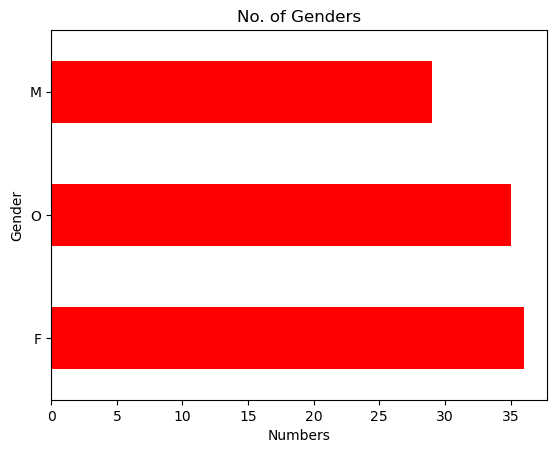

In [20]:
# how to visualize it using matplotlib
gender_count= df3["Gender"].value_counts()
#create a bar plot
gender_count.plot(kind='barh',color='red')

plt.title('No. of Genders')
plt.xlabel('Numbers')

plt.xticks(rotation=0) # you  know why it is used

plt.show()

# if you want to presnt same in decending order
# assuming df3 is your dataframe and "gender" is one of the column of intrest
# sorting the column in decending order explicitly, if needed
# gender_count = gender_count.sort_values(accending = False)

### Groupby: for gender average score

In [21]:
# grouping function
df3.groupby('Gender')["Math Score"].mean()

Gender
F    53.0
M    40.0
O    46.8
Name: Math Score, dtype: float64

### aggrigate fuction for multiple statistical operation

In [22]:
df3.groupby('Gender')['Math Score'].agg(['sum','mean','min','max'])

,sum,mean,min,max
Gender,,,,
F,1908.0,53.0,0.0,100.0
M,1160.0,40.0,0.0,95.0
O,1638.0,46.8,0.0,98.0


### Pivot

In [26]:
pd.pivot_table(data=df3,
               values= ['Math Score','English Score','Science Score'],
               index = 'Gender',
               margins = True)      # margin does the same thing as it looks like

,English Score,Math Score,Science Score
Gender,,,
F,41.277778,53.00,57.611111
M,36.793103,40.00,44.655172
O,42.742857,46.80,51.142857
All,40.490000,47.06,51.590000


### we can create a new column in our dataframe

In [28]:
df3['Total Score'] = df3['Math Score'] + df3['English Score'] + df3['Science Score']
df3['Average per group'] = df3.groupby('Gender')['Total Score'].transform('mean')
df3.head()

,Name,Email,Age,Gender,City,Country,Math Score,Science Score,English Score,Total Score,Average per group
0,Joshua Pearson,ronaldlewis@example.com,44.0,O,North Scottbury,Montserrat,10.0,22,20,52.0,140.685714
2,Tommy Cole,swatson@example.com,53.0,M,Lake Loganburgh,Equatorial Guinea,4.0,15,41,60.0,121.448276
4,John Brock,georgesteven@example.org,50.0,F,Ericchester,Sierra Leone,2.0,63,31,96.0,151.888889
6,Steven Byrd,jessejenkins@example.net,34.0,O,New Scotthaven,Sao Tome and Principe,57.0,86,18,161.0,140.685714
8,Jose Anderson,vmcclain@example.net,55.0,F,East Miafort,Germany,100.0,75,59,234.0,151.888889


# numpy conditional

### np.where

In [29]:
# average score of maths

In [32]:
avg_of_math = df3['Math Score'].mean()

In [30]:
# using np.where we are puting a condition
# where the maths score is greather than the avgerage, put above average, or put below average

In [33]:
np.where(df3['Math Score'] > avg_of_math, 'above avergae' , 'below average')

array(['below average', 'below average', 'below average', 'above avergae',
       'above avergae', 'above avergae', 'above avergae', 'below average',
       'above avergae', 'above avergae', 'below average', 'below average',
       'above avergae', 'below average', 'above avergae', 'below average',
       'above avergae', 'below average', 'above avergae', 'below average',
       'below average', 'above avergae', 'below average', 'below average',
       'below average', 'below average', 'above avergae', 'below average',
       'below average', 'above avergae', 'above avergae', 'above avergae',
       'below average', 'above avergae', 'above avergae', 'below average',
       'above avergae', 'above avergae', 'above avergae', 'below average',
       'below average', 'above avergae', 'above avergae', 'above avergae',
       'below average', 'above avergae', 'above avergae', 'above avergae',
       'below average', 'below average', 'above avergae', 'above avergae',
       'below average', '

In [35]:
df3['MathScore_AboveBelow'] = np.where(df3['Math Score'] > avg_of_math, 'above avergae' , 'below average')
df3.head()

,Name,Email,Age,Gender,City,Country,Math Score,Science Score,English Score,Total Score,Average per group,MathScore_AboveBelow
0,Joshua Pearson,ronaldlewis@example.com,44.0,O,North Scottbury,Montserrat,10.0,22,20,52.0,140.685714,below average
2,Tommy Cole,swatson@example.com,53.0,M,Lake Loganburgh,Equatorial Guinea,4.0,15,41,60.0,121.448276,below average
4,John Brock,georgesteven@example.org,50.0,F,Ericchester,Sierra Leone,2.0,63,31,96.0,151.888889,below average
6,Steven Byrd,jessejenkins@example.net,34.0,O,New Scotthaven,Sao Tome and Principe,57.0,86,18,161.0,140.685714,above avergae
8,Jose Anderson,vmcclain@example.net,55.0,F,East Miafort,Germany,100.0,75,59,234.0,151.888889,above avergae


In [36]:
df3['MathScore_AboveBelow'].value_counts()

MathScore_AboveBelow
below average    52
above avergae    48
Name: count, dtype: int64

## putting it inside a fuction

so that we don't need to write code again and again

In [37]:
def above_avg(df,col,new_col):
    df[new_col] = np.where( df[col] > df[col].mean() , 'above average' , 'below average' )
    return df

above_avg(df3,'Science Score','Science_AboveBelow')
above_avg(df3,'English Score','English_AboveBelow')

,Name,Email,Age,Gender,City,Country,Math Score,Science Score,English Score,Total Score,Average per group,MathScore_AboveBelow,Science_AboveBelow,English_AboveBelow
0,Joshua Pearson,ronaldlewis@example.com,44.0,O,North Scottbury,Montserrat,10.0,22,20,52.0,140.685714,below average,below average,below average
2,Tommy Cole,swatson@example.com,53.0,M,Lake Loganburgh,Equatorial Guinea,4.0,15,41,60.0,121.448276,below average,below average,above average
4,John Brock,georgesteven@example.org,50.0,F,Ericchester,Sierra Leone,2.0,63,31,96.0,151.888889,below average,above average,below average
6,Steven Byrd,jessejenkins@example.net,34.0,O,New Scotthaven,Sao Tome and Principe,57.0,86,18,161.0,140.685714,above avergae,above average,below average
8,Jose Anderson,vmcclain@example.net,55.0,F,East Miafort,Germany,100.0,75,59,234.0,151.888889,above avergae,above average,above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Sheila Aguilar,rsmith@example.com,22.0,O,East Adam,Gabon,24.0,1,55,80.0,140.685714,below average,below average,above average
106,Brittany Poole,joshuatorres@example.org,61.0,F,Thomaschester,Nepal,9.0,8,19,36.0,151.888889,below average,below average,below average
107,Alicia Taylor,janice39@example.com,58.0,F,Patelberg,Saint Martin,83.0,100,32,215.0,151.888889,above avergae,above average,below average
108,Ann Santos,janet15@example.org,18.0,F,Lake Dana,Mauritania,88.0,99,52,239.0,151.888889,above avergae,above average,above average


# Rename a column

when we are renameing any column that will always be indie a dictinary

In [38]:
df3.rename({'Email':'Email_ID'},axis=1 , inplace=True)

In [39]:
df3.head()

,Name,Email_ID,Age,Gender,City,Country,Math Score,Science Score,English Score,Total Score,Average per group,MathScore_AboveBelow,Science_AboveBelow,English_AboveBelow
0,Joshua Pearson,ronaldlewis@example.com,44.0,O,North Scottbury,Montserrat,10.0,22,20,52.0,140.685714,below average,below average,below average
2,Tommy Cole,swatson@example.com,53.0,M,Lake Loganburgh,Equatorial Guinea,4.0,15,41,60.0,121.448276,below average,below average,above average
4,John Brock,georgesteven@example.org,50.0,F,Ericchester,Sierra Leone,2.0,63,31,96.0,151.888889,below average,above average,below average
6,Steven Byrd,jessejenkins@example.net,34.0,O,New Scotthaven,Sao Tome and Principe,57.0,86,18,161.0,140.685714,above avergae,above average,below average
8,Jose Anderson,vmcclain@example.net,55.0,F,East Miafort,Germany,100.0,75,59,234.0,151.888889,above avergae,above average,above average


### if we want rename multiple column name

In [40]:
df3.rename({'Math Score':'Math_score',
           'English Score':'English_score',
           'Science Score':'Science_score'}, axis=1 , inplace=True)

In [41]:
df3.head()

,Name,Email_ID,Age,Gender,City,Country,Math_score,Science_score,English_score,Total Score,Average per group,MathScore_AboveBelow,Science_AboveBelow,English_AboveBelow
0,Joshua Pearson,ronaldlewis@example.com,44.0,O,North Scottbury,Montserrat,10.0,22,20,52.0,140.685714,below average,below average,below average
2,Tommy Cole,swatson@example.com,53.0,M,Lake Loganburgh,Equatorial Guinea,4.0,15,41,60.0,121.448276,below average,below average,above average
4,John Brock,georgesteven@example.org,50.0,F,Ericchester,Sierra Leone,2.0,63,31,96.0,151.888889,below average,above average,below average
6,Steven Byrd,jessejenkins@example.net,34.0,O,New Scotthaven,Sao Tome and Principe,57.0,86,18,161.0,140.685714,above avergae,above average,below average
8,Jose Anderson,vmcclain@example.net,55.0,F,East Miafort,Germany,100.0,75,59,234.0,151.888889,above avergae,above average,above average


### As we see that Age column have age in Float datatype but it should be an interger

In [42]:
df3['Age'] = df3['Age'].astype(int)
df3.head()

,Name,Email_ID,Age,Gender,City,Country,Math_score,Science_score,English_score,Total Score,Average per group,MathScore_AboveBelow,Science_AboveBelow,English_AboveBelow
0,Joshua Pearson,ronaldlewis@example.com,44,O,North Scottbury,Montserrat,10.0,22,20,52.0,140.685714,below average,below average,below average
2,Tommy Cole,swatson@example.com,53,M,Lake Loganburgh,Equatorial Guinea,4.0,15,41,60.0,121.448276,below average,below average,above average
4,John Brock,georgesteven@example.org,50,F,Ericchester,Sierra Leone,2.0,63,31,96.0,151.888889,below average,above average,below average
6,Steven Byrd,jessejenkins@example.net,34,O,New Scotthaven,Sao Tome and Principe,57.0,86,18,161.0,140.685714,above avergae,above average,below average
8,Jose Anderson,vmcclain@example.net,55,F,East Miafort,Germany,100.0,75,59,234.0,151.888889,above avergae,above average,above average


# Exporting this score sheet in csv

In [ ]:
df3.to_csv('Score_sheet.csv')